Mounted on Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reference**


LDA — Latent Dirichlet Allocation
https://towardsdatascience.com/topic-modelling-in-python-with-spacy-and-gensim-dc8f7748bdbf


https://fouadroumieh.medium.com/topic-modeling-and-semantic-clustering-with-spacy-960dd4ac3c9a


Mastering Text Analysis and Topic Modeling with spaCy and Gensim

LSI — Latent Semantic Indexing

HDP — Hierarchical Dirichlet Process

LDA — Latent Dirichlet Allocation

https://medium.com/nlplanet/text-analysis-topic-modelling-with-spacy-gensim-4cd92ef06e06


7 NLP Techniques for Extracting Information from Unstructured Text using Algorithms

https://www.width.ai/post/extracting-information-from-unstructured-text-using-algorithms


SAAS

https://monkeylearn.com/topic-analysis/

evaluate

https://iopscience.iop.org/article/10.1088/1742-6596/1748/3/032036/pdf


chatGPT

https://medium.com/@stephensonebinezer/transform-your-topic-modeling-with-chatgpt-cutting-edge-nlp-f4654b4eac99

https://towardsdatascience.com/topic-modelling-using-chatgpt-api-8775b0891d16



# Prepare the Data

1.Read the zip file contents

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import os
import xml.etree.ElementTree as ET
from concurrent.futures import ThreadPoolExecutor
import re


directory = "/content/drive/MyDrive/Colab Notebooks/TextMining/report/"
files_dict = {}
import zipfile
output = ''
with zipfile.ZipFile(directory+'Assignment2BlogData.zip', "r") as z:
  count = 0
  #literate the file content by filename
  for filename in z.namelist(): #namelist() get filename list
    with z.open(filename) as f:
      if not filename.endswith('.xml'):
          continue

      xml_content_bytes = f.read()
      xml_content = ""
      xml_content = xml_content_bytes.decode('latin-1')

      #extract the content from the tag
      posts = re.findall(r'<post>(.*?)</post>', xml_content, re.DOTALL)
      #combine the content to a string, and join by '.'
      combined_content = '. '.join(posts)
      #dict:{filename, file content}
      files_dict[filename] = combined_content[:1000000]
      #print(filename)
      count += 1
      if count>10:
        break

# 将 files_dict 转换为 DataFrame
df = pd.DataFrame(list(files_dict.items()), columns=['filename', 'content'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,filename,content
0,blogs/1000331.female.37.indUnk.Leo.xml,"\r\n\r\n\t \r\n Well, everyone got up and..."
1,blogs/1000866.female.17.Student.Libra.xml,"\r\n\r\n\t \r\n Yeah, sorry for not writ..."
2,blogs/1004904.male.23.Arts.Capricorn.xml,"\r\n\r\n\t \r\n cupid,please hear my cry,..."
3,blogs/1005076.female.25.Arts.Cancer.xml,\r\n\r\n\t \r\n and did i mention that i ...
4,blogs/1005545.male.25.Engineering.Sagittarius.xml,\r\n\r\n\t \r\n B-Logs: The Business Blo...
...,...,...
96,blogs/1089661.female.26.indUnk.Libra.xml,\r\n\r\n\r\n \r\n Had a four-hour b...
97,blogs/1089670.female.17.Student.Sagittarius.xml,\r\n\r\n \r\n Hua.. finally I can get...
98,blogs/1090235.female.17.indUnk.Aquarius.xml,\r\n\r\n\t \r\n stuff is so changing like...
99,blogs/1090547.male.14.Religion.Capricorn.xml,\r\n\r\n\t \r\n How could I forget this.....


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'affordable': 0, 'age': 1, 'allow': 2, 'appeal': 3, 'arrangement': 4, 'art': 5, 'ballpark': 6, 'baseball': 7, 'basement': 8, 'be': 9, 'beautiful': 10, 'bed': 11, 'best': 12, 'bind': 13, 'birthday': 14, 'bit': 15, 'blog': 16, 'blue': 17, 'book': 18, 'bookstore': 19, 'breadmaker': 20, 'break': 21, 'bug': 22, 'buy': 23, 'can': 24, 'canada': 25, 'cancel': 26, 'canning': 27, 'care': 28, 'cart': 29, 'case': 30, 'cat': 31, 'catalogue': 32, 'cbc': 33, 'cease': 34, 'change': 35, 'cheap': 36, 'check': 37, 'cheese': 38, 'child': 39, 'city': 40, 'club': 41, 'coffee': 42, 'come': 43, 'cost': 44, 'course': 45, 'cousin': 46, 'create': 47, 'crust': 48, 'curtain': 49, 'cut': 50, 'database': 51, 'day': 52, 'deal': 53, 'decide': 54, 'degree': 55, 'describe': 56, 'dinner': 57, 'dough': 58, 'easy': 59, 'effect': 60, 'elect': 61, 'employer': 62, 'escapist': 63, 'etc': 64, 'exhausting': 65, 'exist': 66, 'fact': 67, 'fall': 68, 'family': 69, 'feed': 70, 'feel': 71, 'field': 72, 'film': 73, 'find': 74, 'flexi

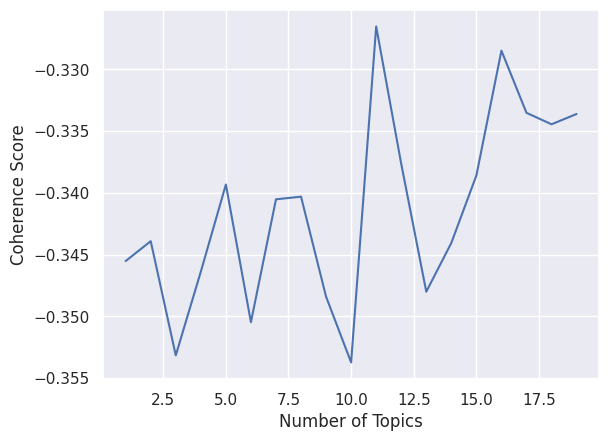

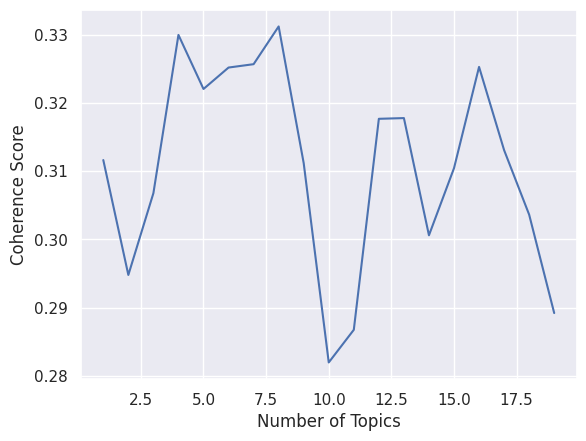

In [ ]:
# Install
import importlib.util

def is_module_installed(module_name):
    spec = importlib.util.find_spec(module_name)
    return spec is not None

# 定义需要检查的模块列表
modules_to_check = ['pyLDAvis', 'gensim', 'spacy', 'matplotlib', 'seaborn']

# 遍历模块列表，检查并安装未安装的模块
for module_name in modules_to_check:
    if not is_module_installed(module_name):
        !pip install {module_name} -qq

# 额外处理 spacy 模块，下载语言模型
if 'spacy' in modules_to_check and not is_module_installed('en_core_web_md'):
    !python -m spacy download en_core_web_md -qq



# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel


#nlp = spacy.load('en_core_web_sm')
##nlp.max_length = 1500000
#print(nlp.max_length)



# Our spaCy model:
nlp = en_core_web_md.load()

# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []

#for summary in nlp.pipe(df['content']):
#  proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
#  tokens.append(proj_tok)



# 定义批处理大小
batch_size = 1

# 初始化 tokens 列表
tokens = []

# 迭代处理每个文档
for batch_idx in range(0, len(df['content']), batch_size):
    batch_content = df['content'].iloc[batch_idx:batch_idx+batch_size]
    for summary in nlp.pipe(batch_content):
        # 处理 summary
        proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
        tokens.append(proj_tok)


# Add tokens to new column
df['tokens'] = tokens
df['tokens']

# Create dictionary
# I will apply the Dictionary Object from Gensim, which maps each word to their unique ID:
dictionary = Dictionary(df['tokens'])
print(dictionary.token2id)

# Filter dictionary
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in df['tokens']]

# LDA model building， LdaMulticore has good performance on multi-cores cpu
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

# Coherence score using C_umass:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

# Coherence score using C_v: more professional
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = df['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

# Optimal model
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=5, workers = 4, passes=100)

# Print topics
lda_model.print_topics(-1)

# Where does a text belong to
lda_model[corpus][0]
df['content'][0]

# Visualize topics
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

# Save the report
pyLDAvis.save_html(lda_display, 'index.html')

In [ ]:


# Save the report
pyLDAvis.save_html(lda_display, directory+'index.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from spacy.lang.en.stop_words  import STOP_WORDS as SPACY_STROP_WORDS
from sklearn.feature_extraction import text as sklearn_text


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')


my_stop_words=None
my_stop_words = stopwords.words('english')
newStopWords = ['it', 'its', 'when',',',':',';'] # add your own stop words to the list here.
my_stop_words = my_stop_words + newStopWords
my_stop_words = sklearn_text.ENGLISH_STOP_WORDS.union(my_stop_words) # append stop_words
my_stop_words = SPACY_STROP_WORDS.union(my_stop_words)  #append stop_words


def remove_stop_words(document):
  global my_stop_words
  #tokenize
  #word_tokens = word_tokenize(document)
  word_tokens = word_tokenize(document)

  filtered_sentence = [w for w in word_tokens if not w.lower() in my_stop_words]
  return ' '.join(filtered_sentence)



def clean_and_stem(document):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', document)
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Remove URLs
    document = re.sub(r'https?://\S+|www\.\S+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Tokenize and remove stop words
    #document = remove_stop_words(document)
    document = word_tokenize(document)
    document = [w for w in document if not w.lower() in my_stop_words]


    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    document = [lemmatizer.lemmatize(word) for word in document]
    document = ' '.join(document)

    return document



# Use ThreadPoolExecutor to parallelize processing
with ThreadPoolExecutor() as executor:
    # Process each record in files_dict in parallel
    for file_path, content in list(files_dict.items())[:100]:
        # Define the cleaning and stemming task inline
        cleaned_content = clean_and_stem(content)
        # Update files_dict with the cleaned content
        files_dict[file_path] = cleaned_content
        #print("-" * 50)  # 分隔线
        #print(cleaned_content)




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
categories = {
    'Males': lambda filename: filename.split('.')[1].lower() == 'male', # 性别
    'Females': lambda filename: filename.split('.')[1].lower() == 'female',
    'Age <= 20': lambda filename: int(filename.split('.')[2]) <= 20, # 年龄
    'Age > 20': lambda filename: int(filename.split('.')[2]) > 20,
    'Students': lambda filename: filename.split('.')[3].lower() == 'student', # 职业
    'Everyone': lambda filename: True
}


def get_file_by_categorize(category_id, files_dict):
    documents_classified = []
    category_condition = categories[list(categories.keys())[category_id]]  # 获取对应类别的条件函数
    for file_path, content in files_dict.items():
      fName = os.path.basename(file_path)
      if category_condition(fName):
          documents_classified.append(content)
    return documents_classified

# 打印每个类别中的内容数量
for category_id in range(0, len(categories) ):
    documents = get_file_by_categorize(category_id, files_dict)
    print(f'{category_id}: {len(documents)} posts')



0: 9660 posts
1: 9660 posts
2: 8240 posts
3: 11080 posts
4: 5120 posts
5: 19320 posts


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# try a category
preprocessed_corpus = get_file_by_categorize(5,files_dict)
# Strategy 2: TF-IDF Vectorization to identify dominant topics
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_corpus)

# Apply NMF for topic extraction
num_topics = 2  # Number of topics to extract
nmf_model = NMF(n_components=num_topics)
nmf_model.fit(tfidf_matrix)

# Extract top topics
top_topics = []
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    top_feature_idxs = topic.argsort()[:-10-1:-1]  # Top 10 features for each topic
    top_features = [feature_names[i] for i in top_feature_idxs]
    top_topics.append(top_features)

# Output clauses containing the dominant topics
for topic_idx, topic in enumerate(top_topics):
    print(f"Top words for Topic {topic_idx + 1}: {topic}")
    # Extract and output clauses containing these words
    for document in preprocessed_corpus:
        if any(word in document for word in topic):
            # Output the clause
            print(f"Document: {document}")


Top words for Topic 1: ['like', 'one', 'well', 'really', 'life', 'go', 'thing', 'get', 'lol', 'got']
Document: impressed even animal prefer local spirit mass market one take story bear guzzled 36 beer preferred local brew especially enjoyed reading caught beer doughnut go show many different way show pride quote surf band 80 local http www cnn com 2004 u west 08 18 bear beer reut index html like tire easily crap nbc want see olympics channel cable would think could see sport past nbc refused air fencing one sport really interest ala get snippet get see men sabre final new wireless technology american team show story build following sport one original olympic sport even blunder 1984 first american ever win medal fencing shrugged countless signature petition signed begging nbc show fencing still refuse justice want show thing year afer year year imagine disney contract abc espn channel would result one could wonder link find happened earlier http news bbc co uk sport2 hi olympics_2004 fe

In [ ]:
#先拿一个类别做实验
documents = get_file_by_categorize(5,files_dict)

# 文本向量化
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(documents)

# 定义LDA模型并拟合数据
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# 提取主题
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

# 打印每个主题的前十个关键词
print("\nTopics in LDA model:")
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, 10)



Topics in LDA model:
Topic #0:
like thing time know good really people life day make

Topic #1:
like urllink went day today den lol got time haiz



In [ ]:
import re

# 定义文本
text = """
<post>This is the first post.</post>
<post>This is the second post.</post>
<post>This is the third post.</post>
"""

# 使用正则表达式匹配 <post> 和 </post> 之间的文本
posts = re.findall(r'<post>(.*?)</post>', text, re.DOTALL)

# 用空格连接匹配到的文本
result = ' '.join(posts)

print(result)


This is the first post. This is the second post. This is the third post.


In [ ]:
#unzip
#!unzip "/content/drive/MyDrive/Colab Notebooks/TextMining/report/Assignment2BlogData.zip" -d "/content/drive/MyDrive/Colab Notebooks/TextMining/report/"